Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?

->A Convolutional Neural Network (CNN) is a deep learning model mainly used for image data. It uses convolution layers to automatically learn spatial features such as edges, shapes, and patterns from images.

Unlike fully connected neural networks, CNNs do not connect every neuron to all neurons in the previous layer. Instead, they use local connectivity and shared weights, which preserves spatial information and reduces the number of parameters. Because of this, CNNs are more efficient and perform much better on image data than traditional fully connected networks.

Question 2: Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.

->LeNet-5 is one of the earliest convolutional neural networks proposed by Yann LeCun et al. for handwritten digit recognition. Its architecture consists of convolution layers, subsampling (pooling) layers, followed by fully connected layers and an output layer. The network follows a clear pattern: convolution → pooling → convolution → pooling → fully connected layers.

LeNet-5 laid the foundation for modern computer vision models by introducing key ideas such as local receptive fields, weight sharing, and hierarchical feature learning, which are still used in today’s deep CNN architectures like AlexNet, VGG, and ResNet.

Reference:
LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-Based Learning Applied to Document Recognition. Proceedings of the IEEE.

Question 3: Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.

->AlexNet and VGGNet are landmark convolutional neural networks that significantly advanced image classification performance.

AlexNet (2012) introduced deep CNNs to large-scale image recognition. Its key innovations include the use of ReLU activation, dropout to reduce overfitting, and GPU-based training. AlexNet uses larger convolution filters (e.g., 11×11, 5×5), which reduces depth but results in about 60 million parameters. While it achieved strong performance on the ImageNet dataset, its large filters and high parameter count make it computationally expensive.

VGGNet (2014) follows a simpler and more uniform design principle by using very small 3×3 convolution filters stacked deeply. This increases network depth and improves feature learning. However, this design leads to a much higher number of parameters, approximately 138 million, making VGGNet memory-intensive and slow to train. Despite this limitation, VGGNet achieved better accuracy than AlexNet and influenced many modern CNN architectures.

Question 4: What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.

->Transfer learning in image classification is a technique where a model trained on a large dataset (such as ImageNet) is reused for a new but related task. Instead of training a CNN from scratch, the pre-trained model’s learned features are transferred to the new problem.

Transfer learning reduces computational cost because most layers are already trained, requiring less training time and resources. It also improves model performance with limited data by using previously learned low-level and high-level image features, which helps prevent overfitting and leads to faster and more accurate learning.

Question 5: Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?

->Residual connections in ResNet allow the input of a layer to be added directly to its output, forming a shortcut (skip) connection. Instead of learning a full mapping, the network learns a residual function, which makes training very deep networks easier.

These connections help solve the vanishing gradient problem by providing a direct path for gradients to flow backward during training. As a result, gradients do not become too small, enabling effective training of very deep CNNs and improving accuracy and convergence.



In [ ]:
'''Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to
classify the MNIST dataset. Report the accuracy and training time.'''

import tensorflow as tf
from tensorflow.keras import layers, models
import time

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = tf.image.resize(x_train[..., None] / 255.0, (32, 32))
x_test = tf.image.resize(x_test[..., None] / 255.0, (32, 32))

model = models.Sequential([
    layers.Conv2D(6, kernel_size=5, activation='relu', input_shape=(32, 32, 1)),
    layers.AveragePooling2D(pool_size=2),
    layers.Conv2D(16, kernel_size=5, activation='relu'),
    layers.AveragePooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

start_time = time.time()

model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=0
)

training_time = time.time() - start_time

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 98.98%
Training Time: 189.59 seconds


In [ ]:
'''Question 7: Use a pre-trained VGG16 model (via transfer learning) on a small custom
dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model.
Include your code and result discussion.
'''

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import time

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)

img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

train_ds = train_ds.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (tf.keras.applications.vgg16.preprocess_input(x), y))

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(5, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

start_time = time.time()

model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=0)

base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=0)

training_time = time.time() - start_time
loss, accuracy = model.evaluate(val_ds, verbose=0)

print(f"Validation Accuracy: {accuracy*100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")



228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Validation Accuracy: 100.00%
Training Time: 433.58 seconds


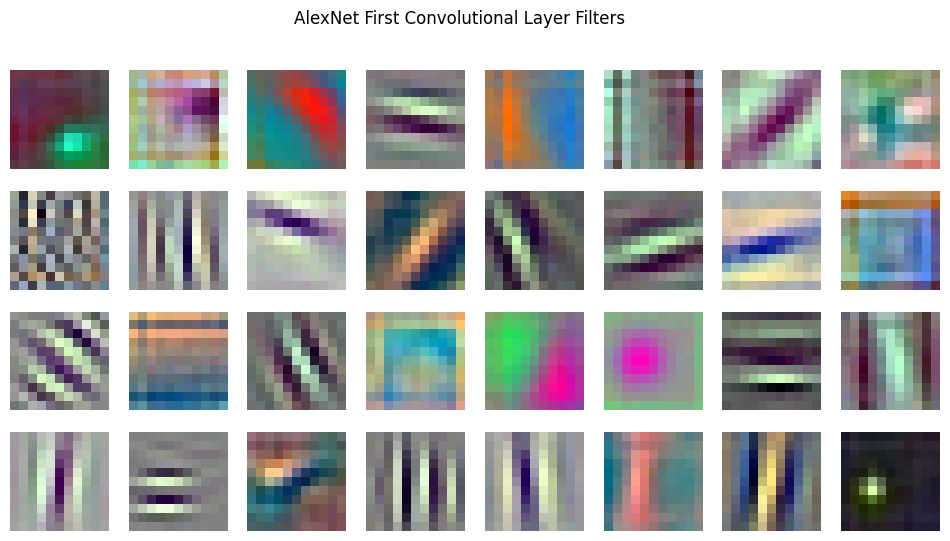

100%|██████████| 661k/661k [00:00<00:00, 113MB/s]


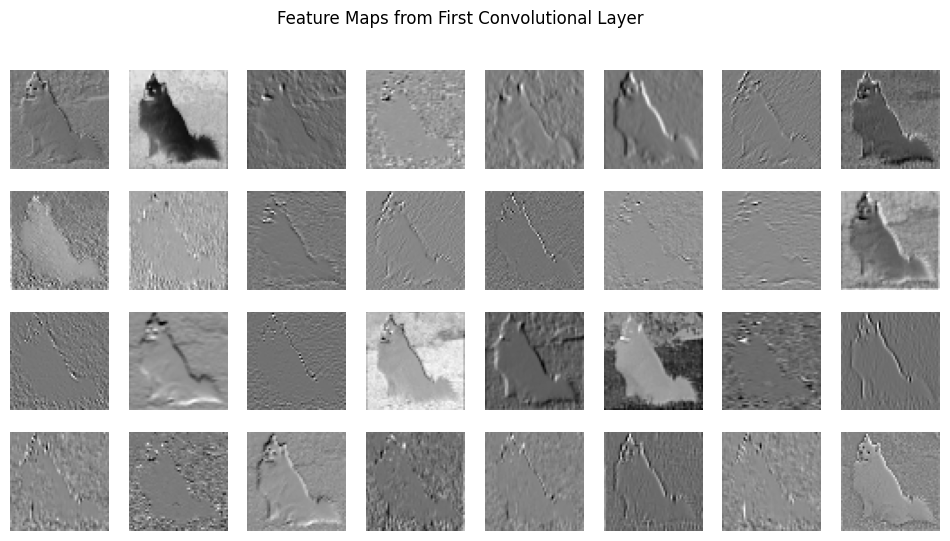

In [ ]:
'''Question 8: Write a program to visualize the filters and feature maps of the first
convolutional layer of AlexNet on an example input image.
'''

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets.utils import download_url
from PIL import Image
import matplotlib.pyplot as plt

model = models.alexnet(pretrained=True)
model.eval()

first_conv = model.features[0]
filters = first_conv.weight.data.clone()

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    f = filters[i]
    f = (f - f.min()) / (f.max() - f.min())
    ax.imshow(f.permute(1, 2, 0))
    ax.axis("off")
plt.suptitle("AlexNet First Convolutional Layer Filters")
plt.show()

url = "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg"
download_url(url, ".", "input.jpg")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

img = Image.open("input.jpg").convert("RGB")
x = transform(img).unsqueeze(0)

with torch.no_grad():
    feature_maps = first_conv(x)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    fm = feature_maps[0, i]
    ax.imshow(fm, cmap="gray")
    ax.axis("off")
plt.suptitle("Feature Maps from First Convolutional Layer")
plt.show()



In [ ]:
'''Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset
like CIFAR-10. Plot the training and validation accuracy over epochs and analyze
overfitting or underfitting.'''

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Inception expects 299x299
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = torchvision.models.inception_v3(weights=None, aux_logits=False, num_classes=10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_acc_list = []
val_acc_list = []

epochs = 5
start_time = time.time()

for epoch in range(epochs):
    model.train()
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = correct_train / total_train
    train_acc_list.append(train_acc)

    model.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    val_acc = correct_val / total_val
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc*100:.2f}% | Val Acc: {val_acc*100:.2f}%")

training_time = time.time() - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

plt.figure()
plt.plot(range(1, epochs+1), train_acc_list, label="Training Accuracy")
plt.plot(range(1, epochs+1), val_acc_list, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy - Inception (GoogLeNet Variant)")
plt.legend()
plt.show()


100%|██████████| 170M/170M [00:13<00:00, 12.4MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Epoch 1/5 - Train Acc: 42.54% | Val Acc: 55.24%
Epoch 2/5 - Train Acc: 64.55% | Val Acc: 66.02%


Question 10: You are working in a healthcare AI startup. Your team is tasked with
developing a system that automatically classifies medical X-ray images into normal,
pneumonia, and COVID-19. Due to limited labeled data, what approach would you
suggest using among CNN architectures discussed (e.g., transfer learning with ResNet
or Inception variants)? Justify your approach and outline a deployment strategy for
production use.

->With limited labeled X-ray data, the best approach is transfer learning using a pretrained CNN, mainly ResNet-50 (Inception-V3 as an alternative).

Justification:
Training a CNN from scratch needs a large dataset, which is not available in healthcare. Pretrained models like ResNet are already trained on ImageNet and have learned general visual features (edges, textures, shapes) that transfer well to medical images. ResNet is especially suitable because residual connections allow deeper networks to train effectively and reduce overfitting, which is important for small datasets.

Approach:

Use a pretrained ResNet-50 model

Freeze the initial layers

Replace the final classification layer with a 3-class softmax (Normal, Pneumonia, COVID-19)

Fine-tune the last few layers with a low learning rate

Apply data augmentation to improve generalization

Deployment Strategy:

Optimize the trained model using TensorFlow Lite or ONNX

Deploy as a REST API using FastAPI or Flask

Use Docker for portability

Provide prediction confidence scores and flag low-confidence cases for radiologist review

